In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


You are going to help Nexus Telecommunication Company understand and
predict customer churn based on information about their account. The data consist of 19 predictors such as number of customer service calls, the area code, and usage duration
collected during one month. The outcome is whether the customer churned (cancelled his
plan) after that month

### I. CODE

In [82]:
import os 
import pandas as pd
print(os.listdir('.'))

['test.csv', 'train.csv']


In [83]:
train_set = pd.read_csv("train.csv")
train_set.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [84]:
test_set = pd.read_csv("test.csv")
test_set.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
608,MA,113,area_code_510,no,no,0,193.1,93,32.83,206.4,85,17.54,215.9,102,9.72,11.1,2,3.00,1,no
222,SD,108,area_code_510,yes,no,0,275.9,84,46.90,203.0,91,17.26,211.4,108,9.51,6.7,4,1.81,2,yes
108,IN,56,area_code_510,no,no,0,254.8,83,43.32,194.0,98,16.49,186.2,118,8.38,13.5,2,3.65,4,no
410,HI,78,area_code_408,no,no,0,89.1,124,15.15,226.6,121,19.26,249.2,88,11.21,6.9,5,1.86,0,no
783,DC,96,area_code_415,no,no,0,217.8,120,37.03,139.6,109,11.87,227.7,111,10.25,11.6,3,3.13,0,no


In [85]:
print (train_set.isna().sum(), test_set.isna().sum(), train_set.shape, test_set.shape)
#There's no Null Data Cell.

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_d

In [86]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [87]:
df = pd.concat([train_set, test_set], ignore_index=True)
print(df.apply(lambda col: col.nunique()))

state                              51
account_length                    218
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
dtype: int64


There's no missing data.

## 1. Data Pre-Processing

In [88]:
# Categorical Data Processing
from sklearn.preprocessing import LabelEncoder
# 1. One-hot encoding for : international_plan, voice_mail_plan, churn

df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

# 2. Lable Encode for : state, area_code
LE = LabelEncoder()

LE.fit(df['state'])
df.state = LE.transform(df.state)
LE.fit(df['area_code'])
df.area_code = LE.transform(df.area_code)

LE.fit(df['area_code'])
df.area_code = LE.transform(df.area_code)

# Add more Feature
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

# 3. Remove Duplicates
df.drop_duplicates()

df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_charge
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [89]:
df.shape

(5000, 21)

In [90]:
print(df.apply(lambda col: col.unique()))

state                            [16, 35, 31, 36, 1, 19, 24, 18, 49, 15, 39, 12...
account_length                   [128, 107, 137, 84, 75, 118, 121, 147, 117, 14...
area_code                                                                [1, 0, 2]
international_plan                                                          [0, 1]
voice_mail_plan                                                             [1, 0]
number_vmail_messages            [25, 26, 0, 24, 37, 27, 33, 39, 30, 41, 28, 34...
total_day_minutes                [265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218...
total_day_calls                  [110, 123, 114, 71, 113, 98, 88, 79, 97, 84, 1...
total_day_charge                 [45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37.0...
total_eve_minutes                [197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348....
total_eve_calls                  [99, 103, 110, 88, 122, 101, 108, 94, 80, 111,...
total_eve_charge                 [16.78, 16.62, 10.3, 5.26, 12.61, 18.75, 29.62...
tota

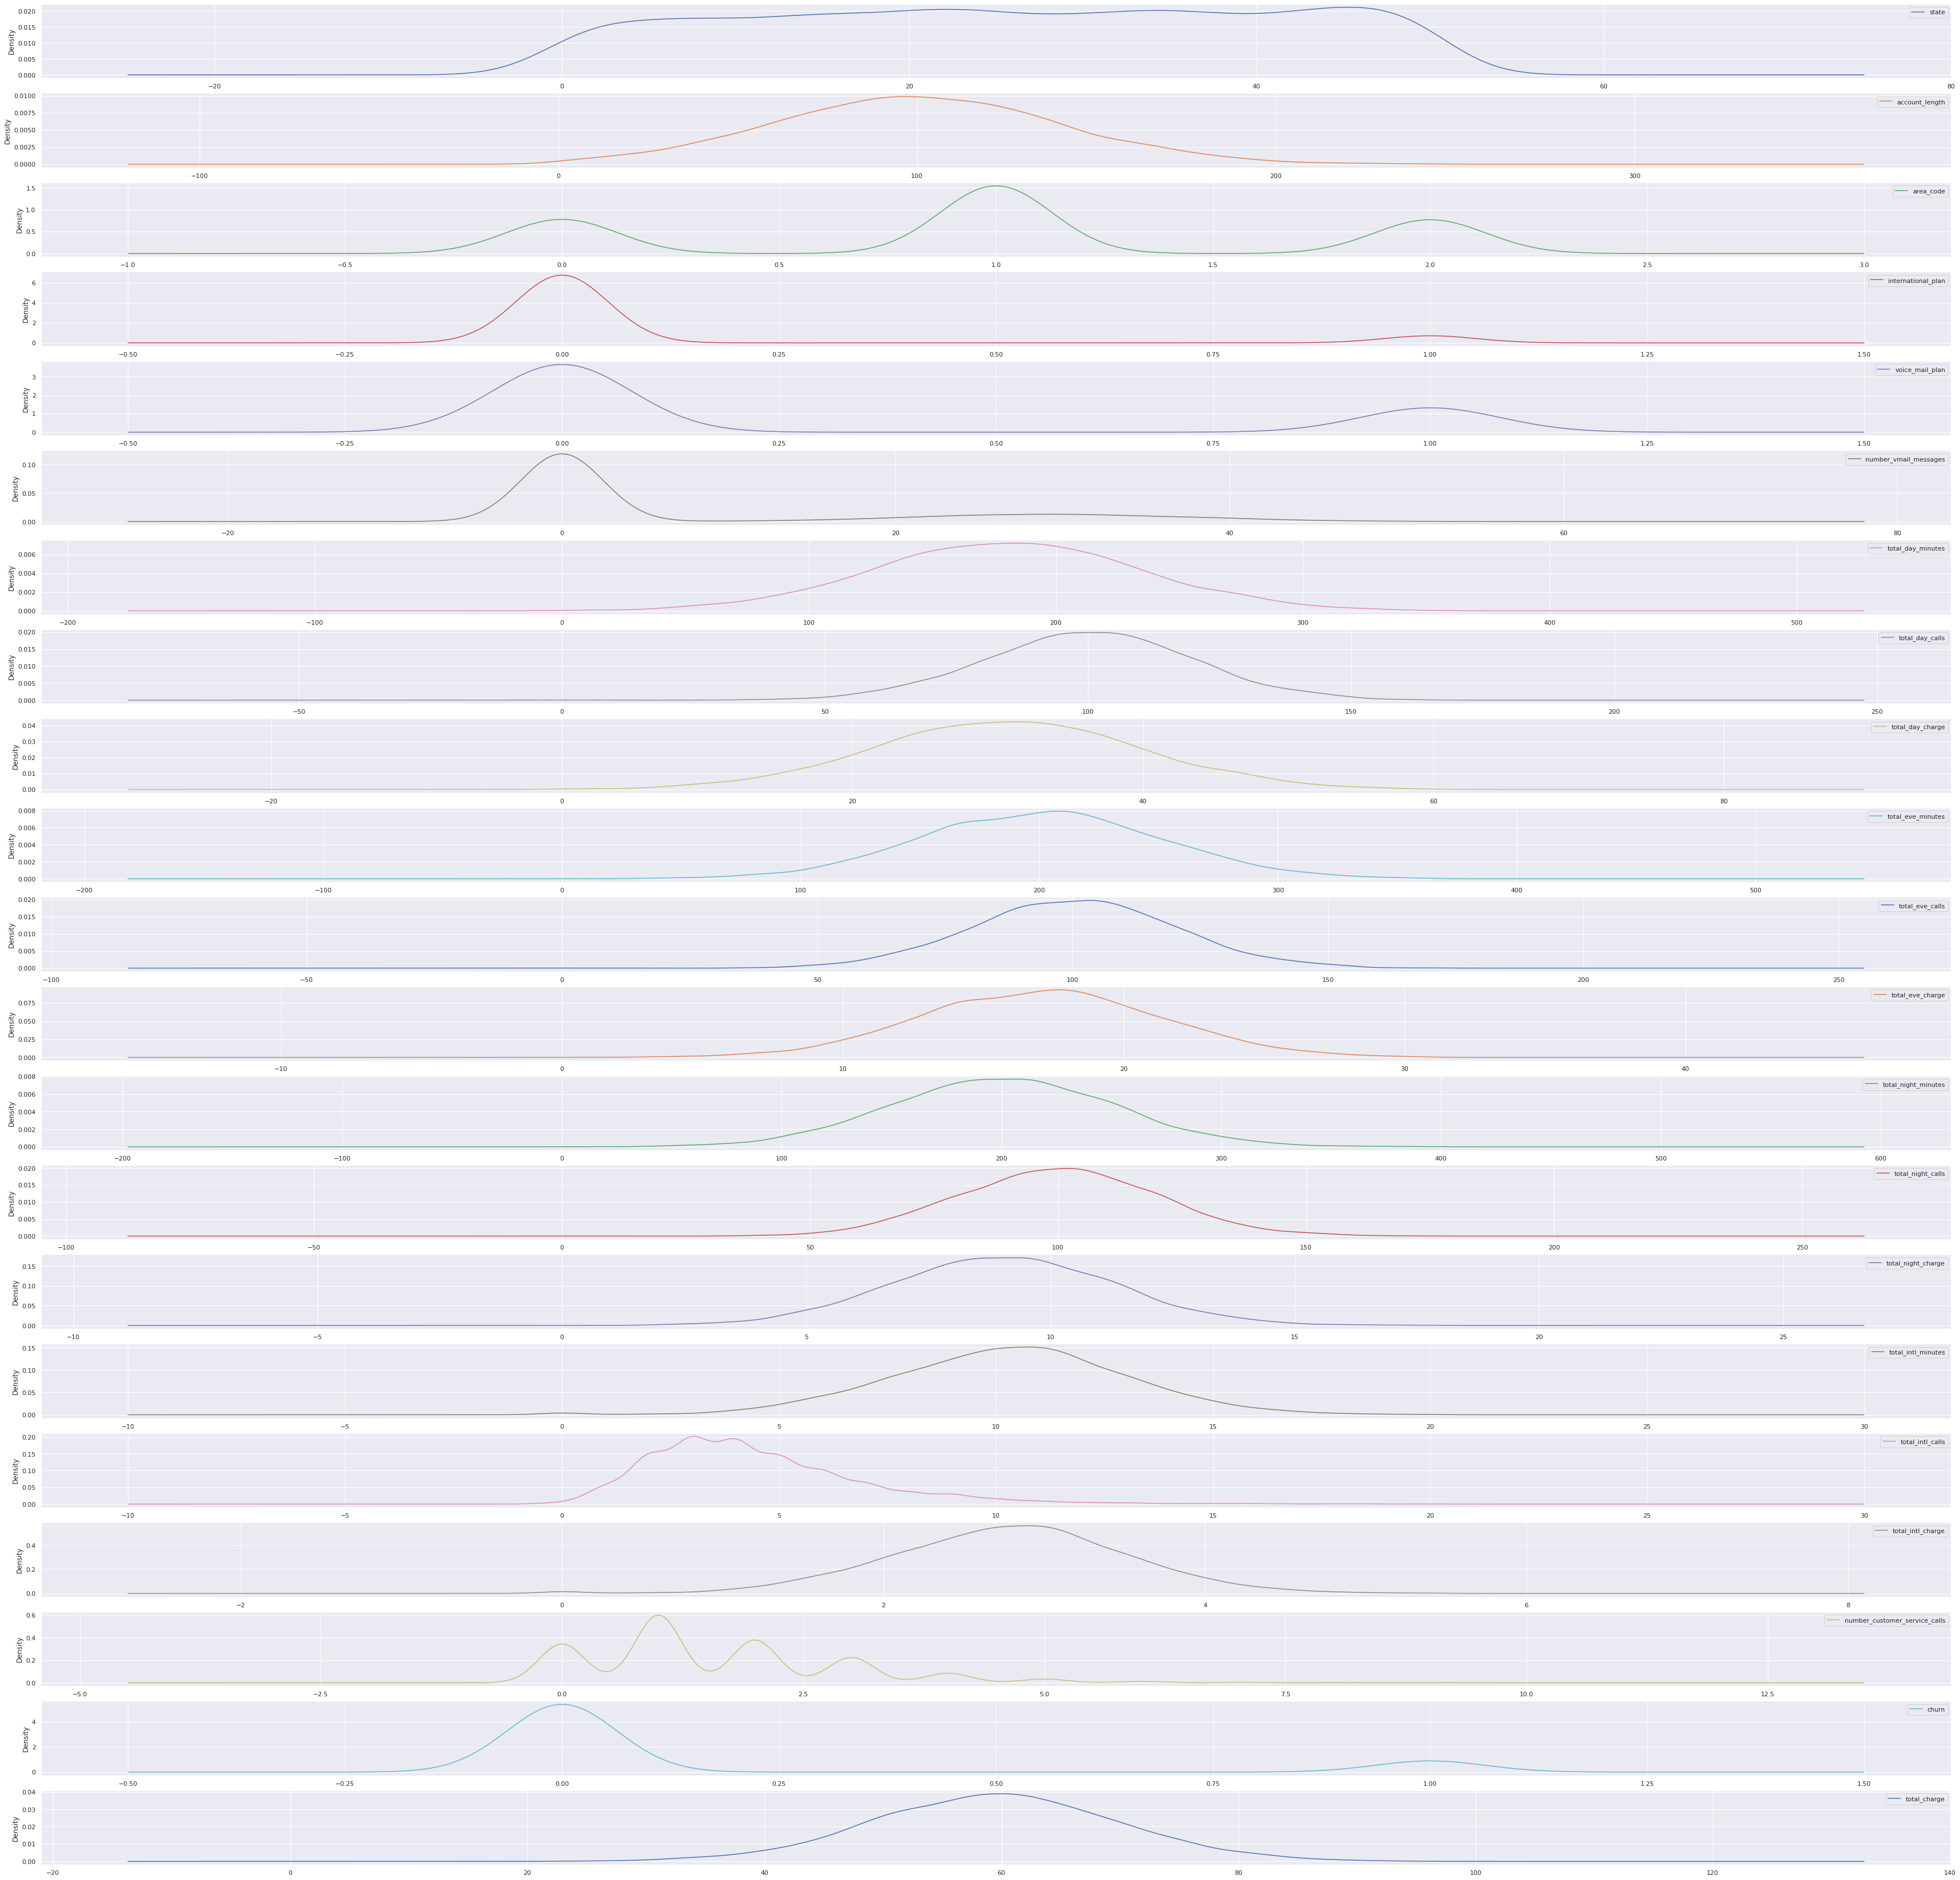

In [91]:
plt.rcParams['figure.figsize'] = [60, 60]
df.plot(kind='density',subplots=True,sharex=False)
plt.show()
#Density of columns, it's hard to look. 
#We will get back after running model.

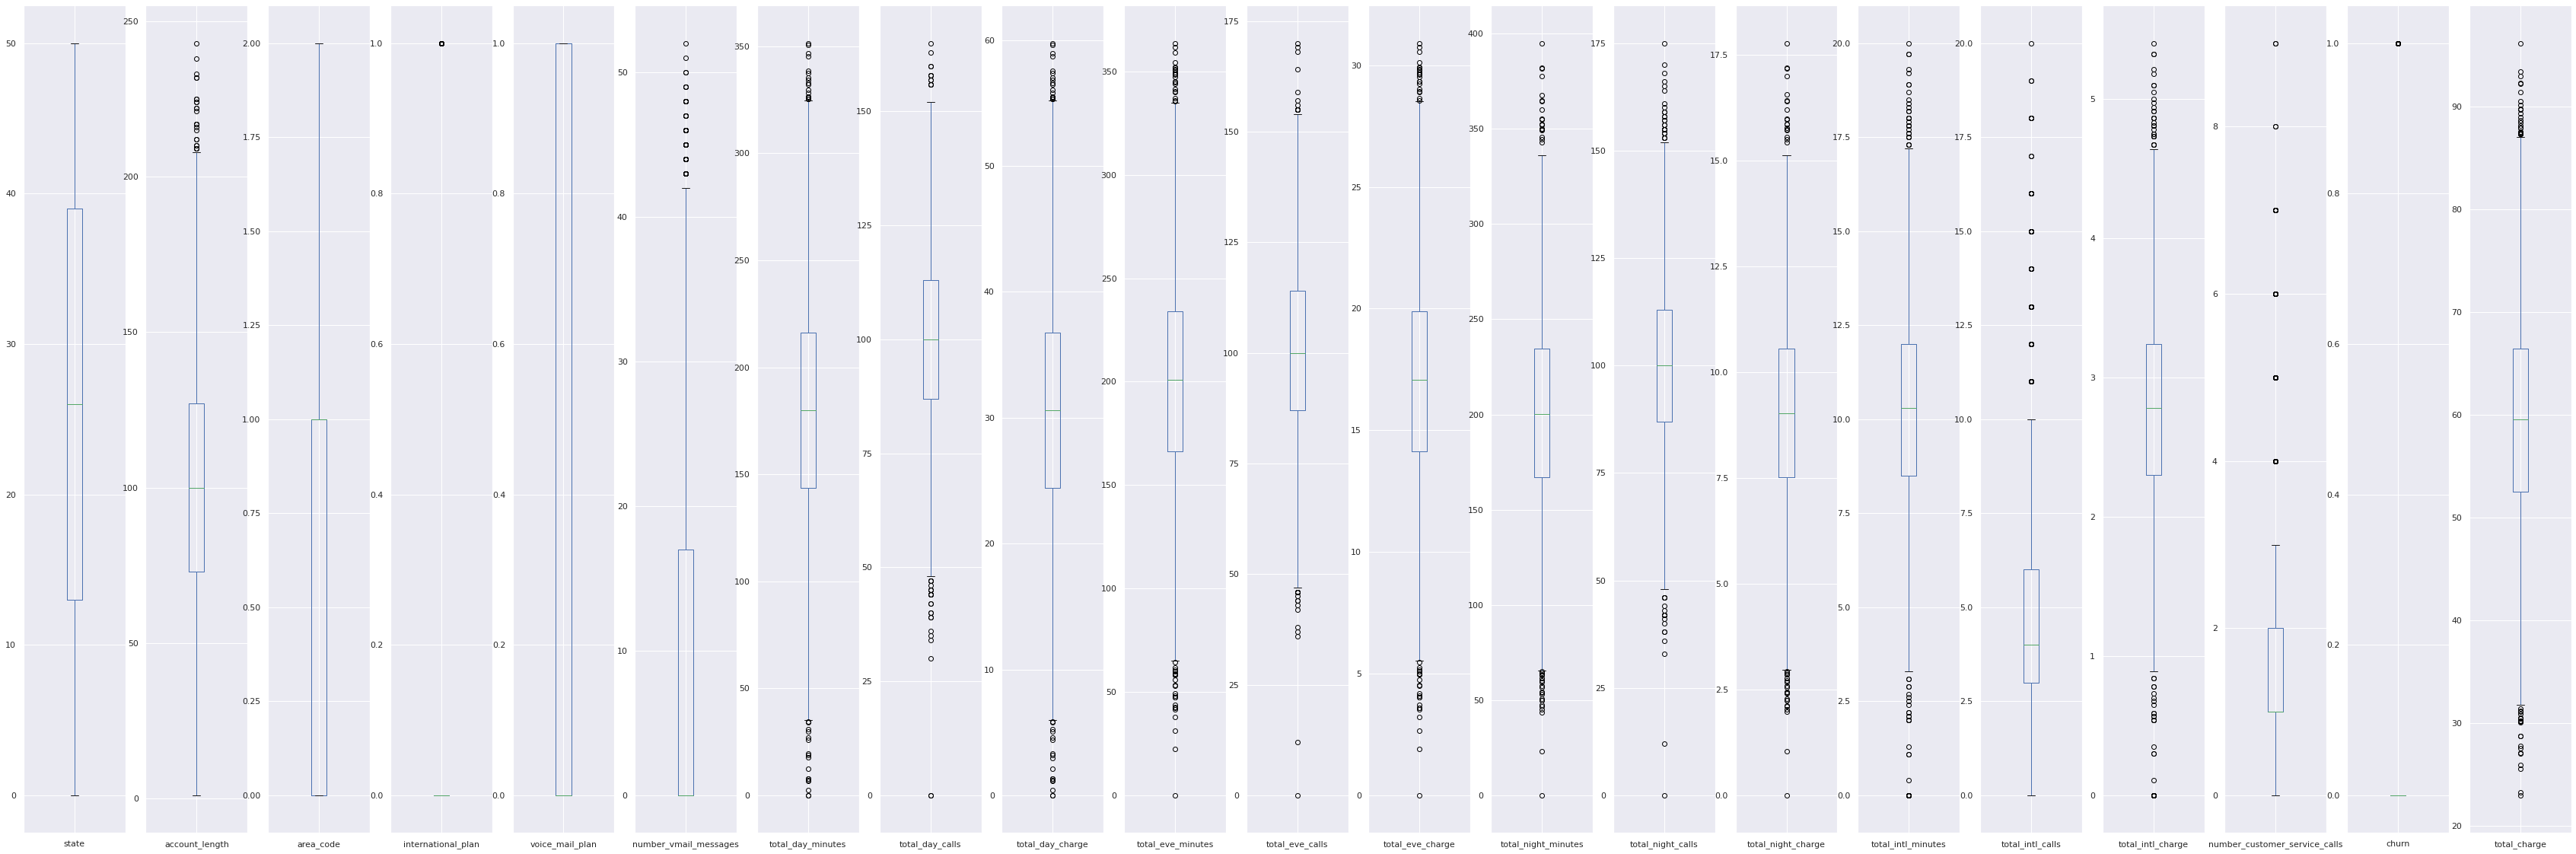

In [92]:
plt.rcParams['figure.figsize'] = [60, 20]
df.plot(kind='box',subplots=True,sharex=False,sharey=False)
plt.show()
#There are some outliers (outside Upper Outer Fence) in "number_customer_service_calls" but this is important feature. Base on Domain Knowledge, I think we shouldn't remove these outliers.

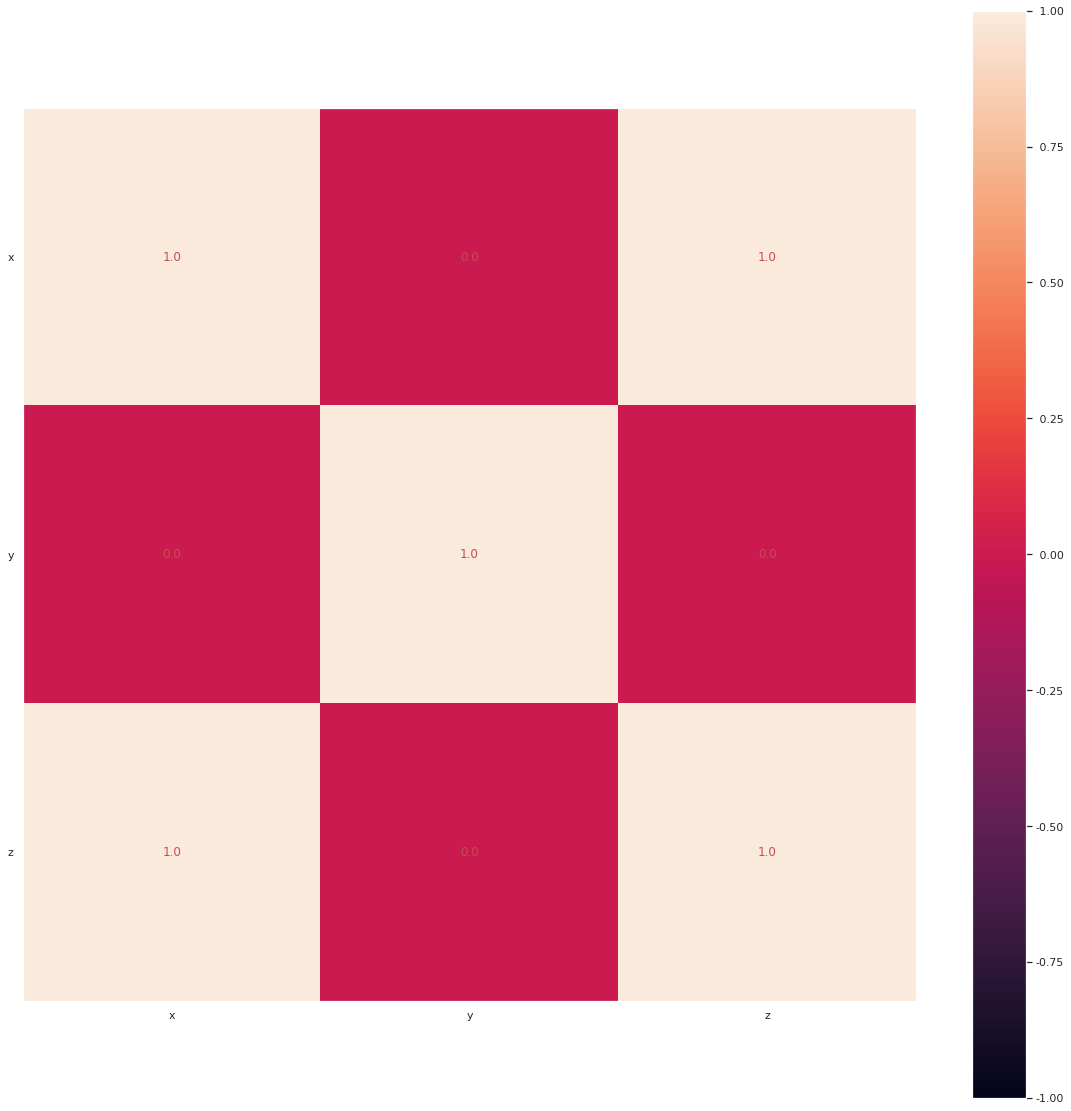

In [94]:
#Plot Correlation
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
plt.rcParams['figure.figsize'] = [20, 20]
#train_set.plot(kind='density',subplots=True,sharex=False)
def correlation_coefficient(x, y, z):
  xyz = np.array([x, y, z])
  corr_matrix = np.corrcoef(xyz).round(decimals=2)
  #Plot
  fig, ax = plt.subplots()
  im = ax.imshow(corr_matrix)
  im.set_clim(-1, 1)
  ax.grid(False)
  ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
  ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
  ax.set_ylim(2.5, -0.5)
  for i in range(3):
    for j in range(3):
      ax.text(j, i, corr_matrix[i, j], ha='center', va='center', color='r')
  cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
  plt.show()

x = df.iloc[:,6].values  #total_day_minutes
y = df.iloc[:,7].values  #total_day_calls
z = df.iloc[:,8].values  #total_day_charge
correlation_coefficient(x, y, z)

As we can see, The **total_minutes** will correlate with **total_charge**, we have to remove correlated features (day, eve, night, international)

## 2. Feature Selection

In [95]:
 from sklearn.feature_selection import VarianceThreshold
#1. Constant Features

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)
print ("Constant Features :", len(df.columns) -len(df.columns[constant_filter.get_support()])) 

#2. Quasi-Constant Features
qconstant_filter = VarianceThreshold(threshold=0.02)
qconstant_filter.fit(df)
print ("Quasi-Constant Features : ", len(df.columns) -len(df.columns[qconstant_filter.get_support()]))

#3. Duplicate Features using Transpose
df_T = df.T
print ("Duplicate Features", df_T.duplicated().sum())

#4. Correlated Features
correlated_features = set()
correlation_matrix = df.corr(method='pearson')
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > 0.8:
      colname = correlation_matrix.columns[i]
      correlated_features.add(colname)
print ("Correlated Features : ", len(correlated_features))
print (correlated_features)

Constant Features : 0
Quasi-Constant Features :  0
Duplicate Features 0
Correlated Features :  6
{'total_intl_charge', 'number_vmail_messages', 'total_day_charge', 'total_charge', 'total_eve_charge', 'total_night_charge'}


In [96]:
# Remove Correlated Features
df.drop(labels=correlated_features, axis=1, index = None, inplace=True)
df.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
4592,41,72,1,0,1,84.3,116,267.2,127,167.7,75,8.3,6,4,1
828,11,64,1,0,0,194.2,147,173.4,87,268.7,114,5.5,2,2,0
2655,29,64,2,0,0,219.2,73,167.0,65,161.4,119,10.0,5,1,0
3345,21,102,1,0,0,228.1,86,156.0,97,227.9,124,10.6,9,1,0
937,7,76,1,0,0,224.4,121,147.9,97,183.8,74,6.7,2,2,0


In [97]:
#There's one way to truncate data (outliers) base on Elliptic Model (contamination is the percent of removed data)
from sklearn.covariance import EllipticEnvelope

outlier_detector = EllipticEnvelope(contamination= .01)

# Fit detector
outlier_detector.fit(df)

# Predict outliers
outlier_arr = outlier_detector.predict(df)
count =0
for emt in outlier_arr:
  if emt == -1:
    count +=1
print (count)
#Our data is quiet small and don't have to be truncated 

50


# 3. Train Model

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
# I chose normalization instead Standardization
from sklearn.preprocessing import MinMaxScaler

X1 = df.drop('churn',axis=1)
Y1 = df['churn']

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1,test_size=0.33,random_state=0)

scaler = preprocessing.MinMaxScaler().fit(X_train1, Y_train1)
X_train_scaled = scaler.transform(X_train1)

pd.DataFrame(X_train_scaled, columns= X_train1.columns).head()

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,0.82,0.548523,1.0,0.0,0.0,0.535633,0.666667,0.551279,0.594118,0.512911,0.714286,0.510,0.55,0.222222
1,0.18,0.147679,1.0,0.0,0.0,0.557298,0.466667,0.429750,0.635294,0.551392,0.760000,0.365,0.10,0.111111
2,0.48,0.514768,0.5,0.0,0.0,0.589795,0.515152,0.672807,0.458824,0.560759,0.777143,0.385,0.10,0.333333
3,0.62,0.443038,0.5,0.0,0.0,0.545610,0.751515,0.551828,0.682353,0.582532,0.434286,0.410,0.15,0.111111
4,0.92,0.388186,1.0,0.0,0.0,0.543615,0.690909,0.599945,0.652941,0.328101,0.691429,0.405,0.15,0.333333


In [99]:
pd.DataFrame(Y_train1).head()

,churn
2826,0
4871,0
226,0
1721,0
17,0


In [100]:
from sklearn.metrics import accuracy_score, average_precision_score

KNN = KNeighborsClassifier()
SVM = SVC(random_state=0)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=150,random_state=0)

accuracies = []
for name, model in zip(['KNN', 'SVM', 'DecisonTree', 'RandomForest'],
                      [KNN, SVM, DT, RF]):
    model.fit(X_train1,Y_train1)
    ypred = model.predict(X_test1)
    accuracy = accuracy_score(Y_test1, ypred)
    precision_score = average_precision_score(Y_test1, ypred)
    F1_scored = metrics.f1_score(Y_test1, ypred)
    accuracies.append([name,accuracy, precision_score])
    print("Accuracy of {} model : {}. Precision Score = {}. F1-Score = {}".format(name, accuracy, precision_score, F1_scored))

Accuracy of KNN model : 0.8721212121212121. Precision Score = 0.22297682709447414. F1-Score = 0.3081967213114754
Accuracy of SVM model : 0.8684848484848485. Precision Score = 0.14545454545454548. F1-Score = 0.035555555555555556
Accuracy of DecisonTree model : 0.9266666666666666. Precision Score = 0.5678020378457059. F1-Score = 0.730512249443207
Accuracy of RandomForest model : 0.9569696969696969. Precision Score = 0.7172176308539945. F1-Score = 0.8155844155844156


ROC Curve and models comparisons

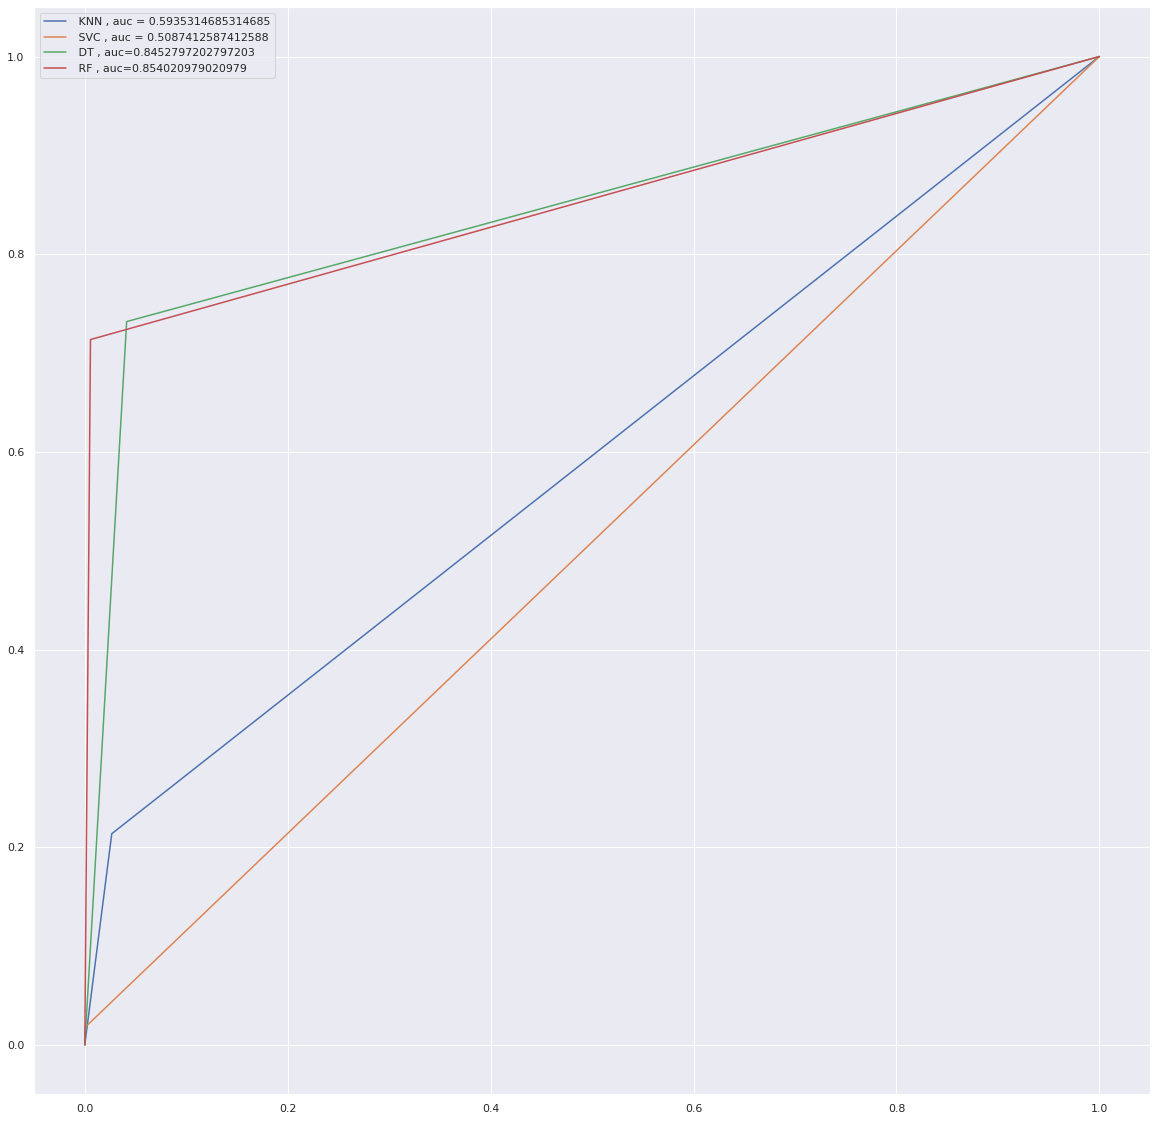

In [101]:
# Plot SVC ROC Curve
from sklearn import metrics

# KNN
KNN.fit(X_train1, Y_train1)
y_KNN = KNN.predict(X_test1)
fpr_knn, tpr_knn, thresh_knn = metrics.roc_curve(Y_test1, y_KNN)
auc_knn = metrics.roc_auc_score(Y_test1, y_KNN)
plt.plot(fpr_knn, tpr_knn, label = " KNN , auc = " + str(auc_knn))

# SVM
SVM.fit(X_train1, Y_train1)
y_SVC = SVM.predict(X_test1)

fpr_svc, tpr_svc, thresh_svc = metrics.roc_curve(Y_test1, y_SVC)
auc_svc = metrics.roc_auc_score(Y_test1, y_SVC)
plt.plot(fpr_svc, tpr_svc, label=" SVC , auc = " + str(auc_svc))

# Decision Tree
DT.fit(X_train1, Y_train1)
y_DT = DT.predict(X_test1)

fpr_dt, tpr_dt, thresh_dt = metrics.roc_curve(Y_test1, y_DT)
auc_dt = metrics.roc_auc_score(Y_test1, y_DT)
plt.plot(fpr_dt, tpr_dt, label=" DT , auc=" + str(auc_dt))

# Random Forest
RF.fit(X_train1, Y_train1)
y_RF = RF.predict(X_test1)
fpr_rf, tpr_rf, thresh_rf = metrics.roc_curve(Y_test1, y_RF)
auc_rf = metrics.roc_auc_score(Y_test1, y_RF)
plt.plot(fpr_rf, tpr_rf, label=" RF , auc=" + str(auc_rf))

plt.legend(loc='best')
plt.show()

### II. Task

1) Conduct exploratory data analysis with a focus on the relationship between the predictors
and the outcome

In [102]:
new_df = X_test1
new_df['prediction'] = y_RF
new_df.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,prediction
4287,39,140,2,0,0,187.1,110,158.0,70,211.4,123,8.5,2,2,0
1144,30,155,0,0,0,216.7,30,144.3,125,135.3,106,10.8,1,2,0
117,33,74,1,0,0,282.5,114,219.9,48,170.0,115,9.4,4,1,1
3595,13,69,2,1,0,199.7,121,189.4,92,264.0,120,11.1,4,6,0
3253,16,127,1,0,1,154.8,69,177.2,105,207.6,102,9.0,4,1,0


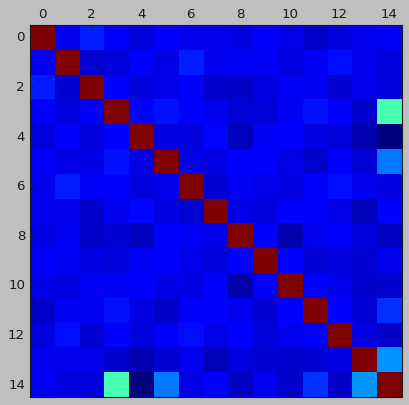

In [107]:
# Try to show correlation between result and Predictors
plt.style.use('classic')
plt.matshow(new_df.corr(method='pearson'))
plt.show()

In [114]:
corr = new_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,prediction
state,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
account_length,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
area_code,0.06,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
international_plan,0.01,-0.02,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
voice_mail_plan,-0.02,0.02,-0.02,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_day_minutes,0.01,-0.01,-0.01,0.05,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_day_calls,-0.01,0.06,0.01,0.01,-0.02,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_eve_minutes,-0.00,-0.01,-0.04,-0.00,0.03,-0.02,-0.02,nan,nan,nan,nan,nan,nan,nan,nan
total_eve_calls,-0.01,0.01,-0.04,-0.03,-0.05,0.02,0.00,-0.01,nan,nan,nan,nan,nan,nan,nan
total_night_minutes,0.01,0.01,-0.01,-0.02,0.01,0.02,-0.01,-0.02,0.02,nan,nan,nan,nan,nan,nan


As we can see, The higher correlation point, the higher connective to the result. (0.37 :international Plan, 0.19 :Number of Service Calls,
0.16 : total_day_minutes)

2) Fit a few models to the training set and tune them via resampling. 

First of all, we will show all distributions of the Predictors, then pick the most unballanced Predictor and decide to Under-Sampling or Over-Sampling (For ex : if the distribution of International_plan was 90% is yes, 10% is no. Let's Over-sampling, elseif distribution was 65% is yes, 35% is no, let's under-sampling) 
Then re-train using Random Forest model with K-fold Cross Validation to find out the model was stable or not.

3) Plot lift charts to compare models. If you wanted to find 80% of the churning
customers, how many customers would have to be identified?